In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts()) # 0또는 1을 반환
diabetes_data.info() #768 개의 데이터, 9개의 칼럼

0    500
1    268
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
# 평가 지표를 출력하는 함수 생성
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy  = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print("오차행렬:\n",confusion)
    print('\n정확도{:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율:{:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC:{:.4f}'.format(AUC))

In [3]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test,pred_proba):
    #threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba)
    
    #x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary],linestyle='--',
            label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary],linestyle=':',label='recall')
    
    # threshold의 값 x축의 scale을 0,1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard,end,0.1),2))
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [4]:
#로지스틱 회귀를 이용해 예측 모델을 생성해 보겠습니다. 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 나누고
# 학습 데이터와 test 데이터로 분리

#feature = X, label = y
X = diabetes_data.iloc[:,:-1] 
#맨 끝이 Outcome 칼럼이브로 레이블 값임
y = diabetes_data.iloc[:,-1]
# data.iloc[:,-1] # 마지막 열만 선택한다는 뜻이다.
# 즉, y = diabetes_data['Outcome']과 같은 의미이다.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀로 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1] # [:,1] 두 번째 열만 본다

get_clf_eval(y_test,pred)

오차행렬:
 [[88 12]
 [23 31]]

정확도0.7727
정밀도: 0.7209
재현율:0.5741
F1: 0.6392
AUC:0.7270


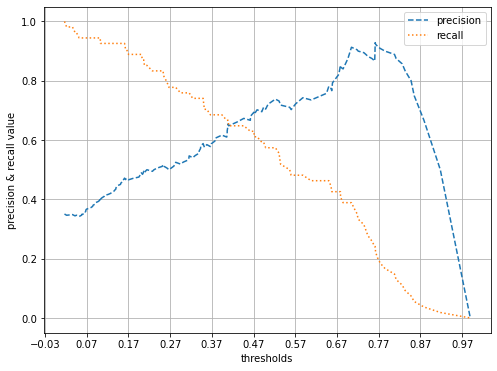

In [5]:
# 임계값 별로 정밀도-재현율 출력
pred_proba = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba)
# 정밀도-재현율 그래프를 보면 임계값(threshold)을 0.42 정도로 맞추면 정밀도와 재현율이
#균형을 이룰 것으로 보임
# 이 때의 정밀도, 재현율은 0.7 정도이므로 높은 수준이 아님.

In [6]:
# 데이터를 먼저 다시 확인해서 개선할 부분이 있는지 확인
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


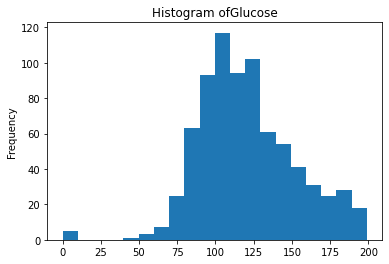

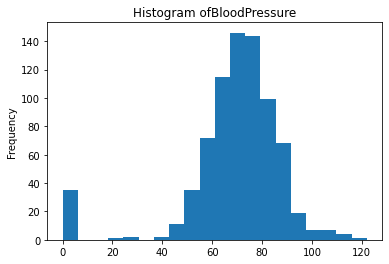

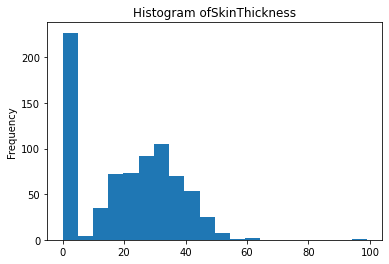

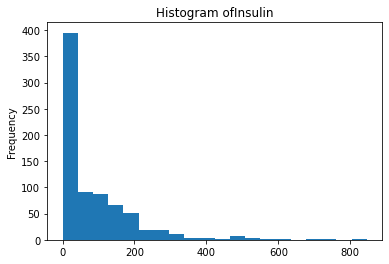

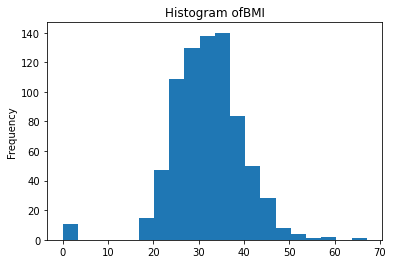

In [7]:
# 최소 값이 0인 것들이 많이 존재함.
feature_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
def hist_plot(df):
    for col in feature_list:
        df[col].plot(kind='hist', bins=20).set_title('Histogram of'+col)
        plt.show()
hist_plot(diabetes_data)

In [8]:
# 위 칼럼들에 대한 0 값의 비율 확인
zero_count = []
zero_percent = []
for col in feature_list:
    zero_num = diabetes_data[diabetes_data[col]==0].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/diabetes_data.shape[0]*100,2))
zero = pd.DataFrame([zero_count,zero_percent], columns=feature_list, index=
                   ['count','percent']).T
zero

,count,percent
Glucose,5.0,0.65
BloodPressure,35.0,4.56
SkinThickness,227.0,29.56
Insulin,374.0,48.70
BMI,11.0,1.43


In [9]:
# Skin Thickness와 Insulin의 경우 0 값의 비율이 상당히 높으므로 0 대신 평균 값으로 대체한다.
# 0 값을 NaN 값으로 대체
diabetes_data[feature_list] = diabetes_data[feature_list].replace(0,np.nan)
#######왜 0을 Nan으로 바꾼 다음 평균으로 대체할까?
# 위 5개 feature에 대해 0값을 평균으로 대체
mean_features = diabetes_data[feature_list].mean()
diabetes_data[feature_list] = diabetes_data[feature_list].replace(np.nan, mean_features)

In [10]:
# 데이터 세트에 대해 feature scaling을 적용해 변환하겠습니다.
# 로지스틱 회귀의 경우 일반적으로 숫자 데이터 스케일링을 적용하는 것이 좋습니다.
# 이후에 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 통해 성능 평가하겠습니다.

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScalar 클래스를 이용해 feature에 일괄적으로 스케일링 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, 
                                                  random_state=11,stratify=y)
#로지스틱 회귀로 학습 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬:
 [[88 12]
 [24 30]]

정확도0.7662
정밀도: 0.7143
재현율:0.5556
F1: 0.6250
AUC:0.7178


In [11]:
# 0 값을 평균값으로 바꾸고, 스케일링을 통해 성능이 개선되었다. 

In [12]:
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [14]:
thresholds = [0.3,0.33,0.36,0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임계값:  0.3
오차행렬:
 [[73 27]
 [13 41]]

정확도0.7403
정밀도: 0.6029
재현율:0.7593
F1: 0.6721
AUC:0.7446

임계값:  0.33
오차행렬:
 [[78 22]
 [14 40]]

정확도0.7662
정밀도: 0.6452
재현율:0.7407
F1: 0.6897
AUC:0.7604

임계값:  0.36
오차행렬:
 [[79 21]
 [16 38]]

정확도0.7597
정밀도: 0.6441
재현율:0.7037
F1: 0.6726
AUC:0.7469

임계값:  0.39
오차행렬:
 [[81 19]
 [17 37]]

정확도0.7662
정밀도: 0.6607
재현율:0.6852
F1: 0.6727
AUC:0.7476

임계값:  0.42
오차행렬:
 [[83 17]
 [18 36]]

정확도0.7727
정밀도: 0.6792
재현율:0.6667
F1: 0.6729
AUC:0.7483

임계값:  0.45
오차행렬:
 [[84 16]
 [20 34]]

정확도0.7662
정밀도: 0.6800
재현율:0.6296
F1: 0.6538
AUC:0.7348

임계값:  0.48
오차행렬:
 [[88 12]
 [23 31]]

정확도0.7727
정밀도: 0.7209
재현율:0.5741
F1: 0.6392
AUC:0.7270

임계값:  0.5
오차행렬:
 [[88 12]
 [24 30]]

정확도0.7662
정밀도: 0.7143
재현율:0.5556
F1: 0.6250
AUC:0.7178


In [15]:
# 임계값을 0.48로 설정하여 예측 수행
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 predict_proba() 예측확률의 array에서 1에 해당하는 칼럼 값을
# 대입하여 Binarizer 반환하기
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
# Binarizer 클래스를 이용해 predict_proba()로 추출한 예측 결과 확률 값을 변환해
# 변경된 임계값에 따른 예측 클래스 값을 구해 보겟습니다.
get_clf_eval(y_test,pred_th_048)

오차행렬:
 [[88 12]
 [23 31]]

정확도0.7727
정밀도: 0.7209
재현율:0.5741
F1: 0.6392
AUC:0.7270
